## 상관행렬로 히트맵 작성
- 상관: 두 변수가 얼마나 함께 움직이느냐, 0.5가 기준!
- 관계가 통계적으로 유의한지 알 수 있는 검정: 피어슨, 스피어만, 켄달

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter05/data/covidtotals.csv',parse_dates=['lastdate'])

In [9]:
corr=covidtotals.corr()
corr[['total_cases','total_deaths','total_cases_pm','total_deaths_pm']]

C:\Users\KYW\AppData\Local\Temp\ipykernel_6648\3251362156.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=covidtotals.corr()


,total_cases,total_deaths,total_cases_pm,total_deaths_pm
total_cases,1.000000,0.930848,0.230787,0.264819
total_deaths,0.930848,1.000000,0.198456,0.414162
total_cases_pm,0.230787,0.198456,1.000000,0.486600
total_deaths_pm,0.264819,0.414162,0.486600,1.000000
population,0.341093,0.281600,-0.042531,-0.001249
pop_density,-0.027335,-0.032487,0.082927,0.021110
median_age,0.115204,0.173887,0.217352,0.375408
gdp_per_capita,0.134902,0.163701,0.576568,0.372001
hosp_beds,-0.014727,-0.012415,0.015465,0.090870


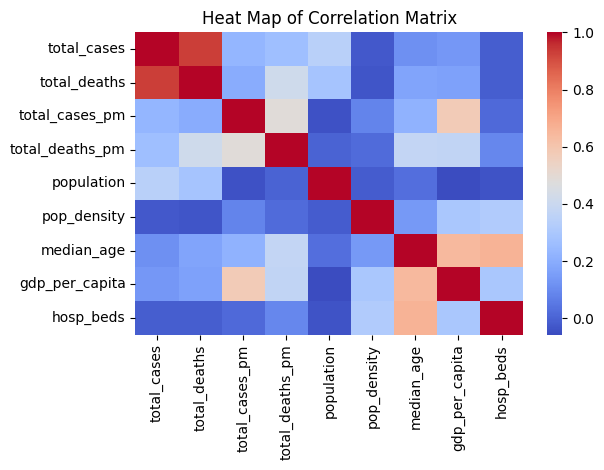

In [13]:
# 상관 행렬 히트맵 생성
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='coolwarm')
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

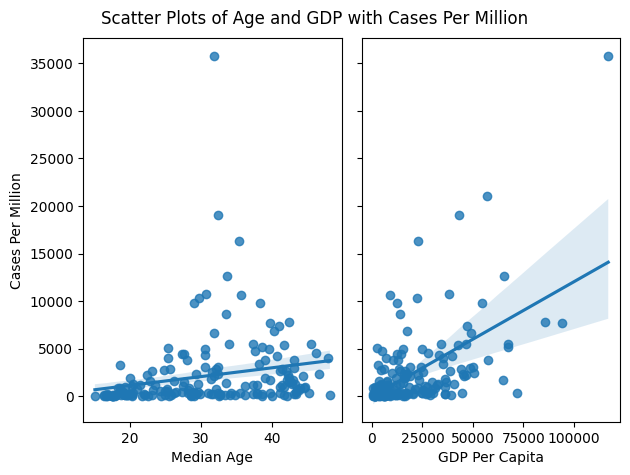

In [12]:
# 중위연령 / 1인당 국내 총생산 - 백만 명당 확진자별 산점도
fig, axes=plt.subplots(1,2,sharey=True)
sns.regplot(x=covidtotals.median_age,y=covidtotals.total_cases_pm,ax=axes[0])
sns.regplot(x=covidtotals.gdp_per_capita,y=covidtotals.total_cases_pm,ax=axes[1])
axes[0].set_xlabel("Median Age")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")
plt.suptitle("Scatter Plots of Age and GDP with Cases Per Million")
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()